In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score , classification_report
from __future__ import print_function
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/sample_data/Crop_recommendation.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.shape

(2200, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


<Axes: >

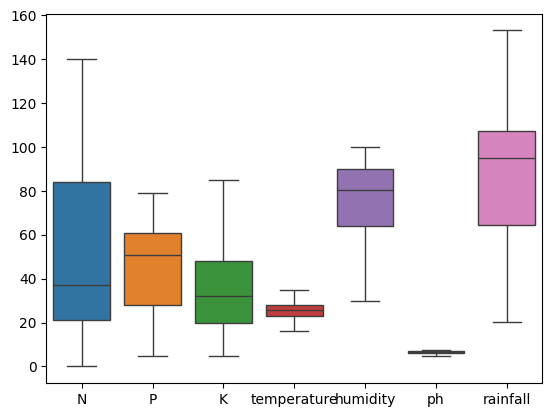

In [75]:
sns.boxplot(df)

<Axes: ylabel='P'>

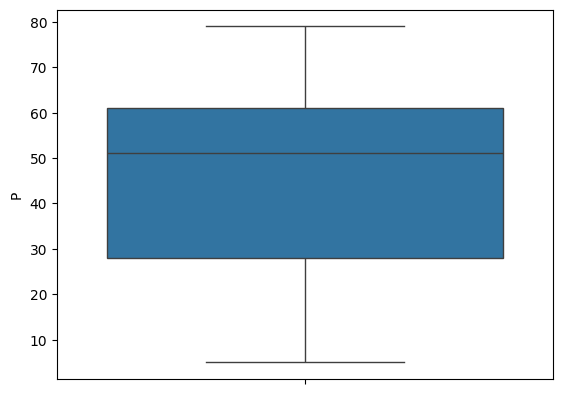

In [21]:
sns.boxplot(df['P'])

In [11]:
df['P'] = df['P'].apply(lambda x: np.mean(df['P']) if x>140 else x)

In [13]:
df.loc[df['P']>120,'P'] = np.mean(df['P'])

In [15]:
from scipy.stats.mstats import winsorize

In [20]:
df['P'] = winsorize(df['P'],(0,0.05))

<Axes: ylabel='K'>

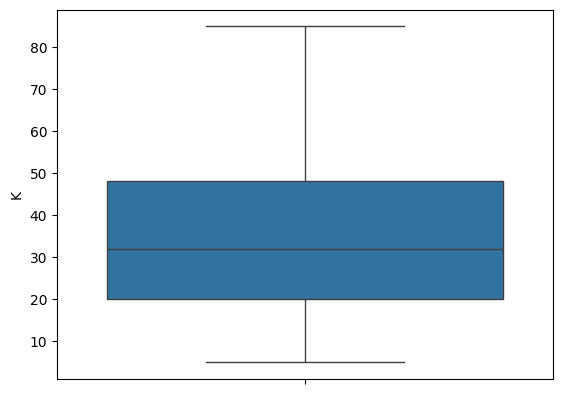

In [24]:
sns.boxplot(df['K'])

In [23]:
df.loc[df['K']>100,'K'] = np.mean(df['K'])

<Axes: ylabel='temperature'>

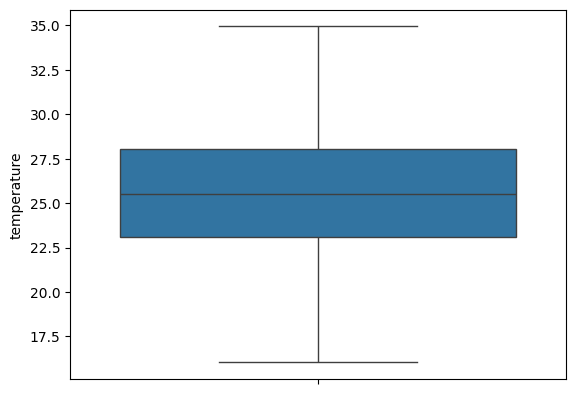

In [41]:
sns.boxplot(df['temperature'])

In [38]:
lower_bound = 16
upper_bound = 35

In [39]:
df.loc[df['temperature']>upper_bound,'temperature'] = np.mean(df['temperature'])

In [40]:
df.loc[df['temperature']<lower_bound,'temperature'] = np.mean(df['temperature'])

<Axes: ylabel='humidity'>

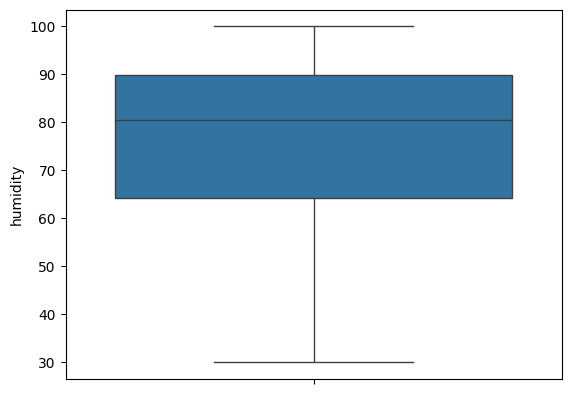

In [50]:
sns.boxplot(df['humidity'])

In [49]:
df.loc[df['humidity']<30,'humidity'] = 30

<Axes: ylabel='ph'>

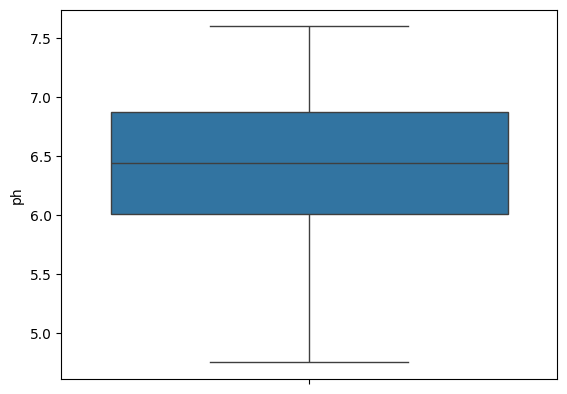

In [65]:
sns.boxplot(df['ph'])

In [60]:
l_b = 4.75
u_b = 8.25

In [61]:
df.loc[df['ph']<l_b,'ph'] = np.mean(df['ph'])

In [62]:
df.loc[df['ph']>u_b,'ph'] = np.mean(df['ph'])
df.loc[df['ph']>u_b,'ph'] = 4.5


In [64]:
df['ph'] = winsorize(df['ph'],(0,0.05))

<Axes: ylabel='rainfall'>

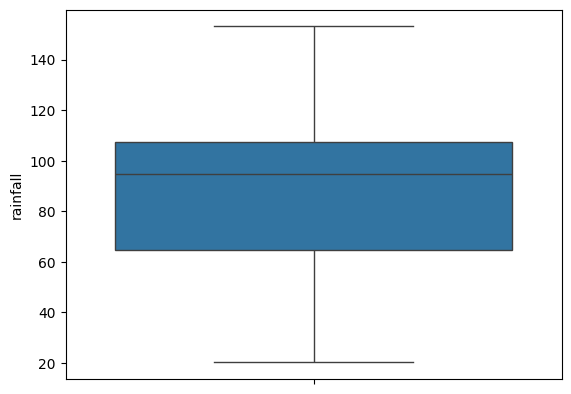

In [95]:
sns.boxplot(df['rainfall'])

In [89]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [71]:
df.loc[df['rainfall']>175,'rainfall'] = np.mean(df['rainfall'])

In [73]:
df['rainfall']=winsorize(df['rainfall'],(0,0.05))

In [96]:
X = df.drop('label',axis=1)
y = df['label']

In [97]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size = 0.2,random_state =2)


In [98]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
acc = []
model = []

In [102]:
predicted_values = DecisionTree.predict(Xtest)
x =accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  85.22727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.84      1.00      0.91        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.33      0.04      0.06        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [103]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.975
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.64      0.78        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00    

In [106]:
from sklearn.model_selection import cross_val_score

In [108]:
score = cross_val_score(NaiveBayes,X,y,cv=5)
score

array([0.98409091, 0.98409091, 0.98409091, 0.97727273, 0.98181818])

In [109]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

RandomForestClassifier(n_estimators=20, random_state=0)

In [111]:
y_pred = RF.predict(Xtest)

In [112]:
x= accuracy_score(Ytest,y_pred)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

RF's Accuracy is:  0.9863636363636363


In [116]:
print(classification_report(Ytest,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.79      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [128]:
np.random.randint(0,100,7)

array([65, 67, 58, 27, 76, 29, 10])

In [129]:
data = np.array([[65, 67, 58, 27, 76, 29, 10]])
prediction = RF.predict(data)
print(prediction)

['muskmelon']


In [119]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [124]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,45.852142,34.344463,25.427804,72.460607,6.450906,88.525038
std,36.917334,20.794120,16.624745,3.842551,20.051822,0.611772,32.856275
min,0.000000,5.000000,5.000000,16.037686,30.000000,4.750929,20.211267
25%,21.000000,28.000000,20.000000,23.095716,60.261953,6.011162,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.447862,94.867624
75%,84.250000,61.000000,48.149091,28.052104,89.948771,6.874623,107.281098
max,140.000000,79.000000,85.000000,34.946616,99.981876,7.597820,153.120164
